In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegoreyes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegoreyes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df_fake_news = pd.read_csv('dataset/Fake.csv')

In [3]:
df_fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_fake_news = df_fake_news[['text']]
df_fake_news['Real or Fake'] = 'Fake'
df_fake_news = df_fake_news.rename(columns={'text': 'news'})

print(df_fake_news.head())

                                                news Real or Fake
0  Donald Trump just couldn t wish all Americans ...         Fake
1  House Intelligence Committee Chairman Devin Nu...         Fake
2  On Friday, it was revealed that former Milwauk...         Fake
3  On Christmas day, Donald Trump announced that ...         Fake
4  Pope Francis used his annual Christmas Day mes...         Fake


In [5]:
df_real_news = pd.read_csv('dataset/True.csv')

In [6]:
df_real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_real_news = df_real_news[['text']]
df_real_news['Real or Fake'] = 'Real'
df_real_news = df_real_news.rename(columns={'text': 'news'})

print(df_real_news.head())

                                                news Real or Fake
0  WASHINGTON (Reuters) - The head of a conservat...         Real
1  WASHINGTON (Reuters) - Transgender people will...         Real
2  WASHINGTON (Reuters) - The special counsel inv...         Real
3  WASHINGTON (Reuters) - Trump campaign adviser ...         Real
4  SEATTLE/WASHINGTON (Reuters) - President Donal...         Real


In [8]:
df = pd.concat([df_fake_news, df_real_news], ignore_index=True)
print(df)

                                                    news Real or Fake
0      Donald Trump just couldn t wish all Americans ...         Fake
1      House Intelligence Committee Chairman Devin Nu...         Fake
2      On Friday, it was revealed that former Milwauk...         Fake
3      On Christmas day, Donald Trump announced that ...         Fake
4      Pope Francis used his annual Christmas Day mes...         Fake
...                                                  ...          ...
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...         Real
44894  LONDON (Reuters) - LexisNexis, a provider of l...         Real
44895  MINSK (Reuters) - In the shadow of disused Sov...         Real
44896  MOSCOW (Reuters) - Vatican Secretary of State ...         Real
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...         Real

[44898 rows x 2 columns]


In [9]:
# Normalize
def normalize_text(text):
    """
    Esta función toma un texto, lo normaliza y devuelve el texto limpio.
    """
    # Inicializar el Stemmer y las stopwords en inglés
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # a. Convertir a minúsculas
    text = text.lower()

    # b. Tokenizar el texto
    tokens = word_tokenize(text)

    # c. Eliminar stopwords y puntuación, y aplicar stemming
    cleaned_tokens = []
    for token in tokens:
        # Conservar solo tokens alfabéticos y que no sean stopwords
        if token.isalpha() and token not in stop_words:
            stemmed_token = stemmer.stem(token)
            cleaned_tokens.append(stemmed_token)

    # d. Unir los tokens de nuevo en un solo string
    return " ".join(cleaned_tokens)

# Aplicamos la función a toda la columna 'news'
df['news'] = df['news'].apply(normalize_text)


In [10]:

# --- 3. Vectorización con TF-IDF 🔢 ---

# Inicializamos el vectorizador
vectorizer = TfidfVectorizer()

# Definimos las variables X (características) y y (objetivo)
X = df['news']
y = df['Real or Fake']

# Creamos la matriz TF-IDF
# .fit_transform() aprende el vocabulario y transforma los datos
X_tfidf = vectorizer.fit_transform(X)


# --- Resultados ---

print("--- DataFrame con texto normalizado ---")
print(df)
print("\n" + "="*40 + "\n")

print("--- Forma de la matriz TF-IDF ---")
# Muestra (número de filas, número de palabras únicas en el vocabulario)
print(X_tfidf.shape)
print("\n" + "="*40 + "\n")

print("Tus datos están listos. 'X_tfidf' son tus características y 'y' tus etiquetas.")

--- DataFrame con texto normalizado ---
                                                    news Real or Fake
0      donald trump wish american happi new year leav...         Fake
1      hous intellig committe chairman devin nune go ...         Fake
2      friday reveal former milwauke sheriff david cl...         Fake
3      christma day donald trump announc would back w...         Fake
4      pope franci use annual christma day messag reb...         Fake
...                                                  ...          ...
44893  brussel reuter nato alli tuesday welcom presid...         Real
44894  london reuter lexisnexi provid legal regulator...         Real
44895  minsk reuter shadow disus factori minsk street...         Real
44896  moscow reuter vatican secretari state cardin p...         Real
44897  jakarta reuter indonesia buy sukhoi fighter je...         Real

[44898 rows x 2 columns]


--- Forma de la matriz TF-IDF ---
(44898, 75434)


Tus datos están listos. 'X_tfidf' son tus

In [11]:
df.head()

,news,Real or Fake
0,donald trump wish american happi new year leav...,Fake
1,hous intellig committe chairman devin nune go ...,Fake
2,friday reveal former milwauke sheriff david cl...,Fake
3,christma day donald trump announc would back w...,Fake
4,pope franci use annual christma day messag reb...,Fake


In [12]:
label_map = {'Real': 1, 'Fake': 0}

# Aplicamos el mapeo para crear la columna objetivo numérica
df['Real or Fake'] = df['Real or Fake'].map(label_map)

print("--- DataFrame con etiquetas numéricas ---")
print(df)

--- DataFrame con etiquetas numéricas ---
                                                    news  Real or Fake
0      donald trump wish american happi new year leav...             0
1      hous intellig committe chairman devin nune go ...             0
2      friday reveal former milwauke sheriff david cl...             0
3      christma day donald trump announc would back w...             0
4      pope franci use annual christma day messag reb...             0
...                                                  ...           ...
44893  brussel reuter nato alli tuesday welcom presid...             1
44894  london reuter lexisnexi provid legal regulator...             1
44895  minsk reuter shadow disus factori minsk street...             1
44896  moscow reuter vatican secretari state cardin p...             1
44897  jakarta reuter indonesia buy sukhoi fighter je...             1

[44898 rows x 2 columns]


Logistic Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.25, random_state=42
)

In [14]:
# Esta línea CREA la variable
log_reg_model = LogisticRegression(random_state=42)

# Esta línea ENTRENA el modelo que está en la variable
log_reg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'



--- Resultados de la Evaluación ---
Accuracy (Precisión): 0.9838

Reporte de Clasificación:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      5895
        Real       0.98      0.98      0.98      5330

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



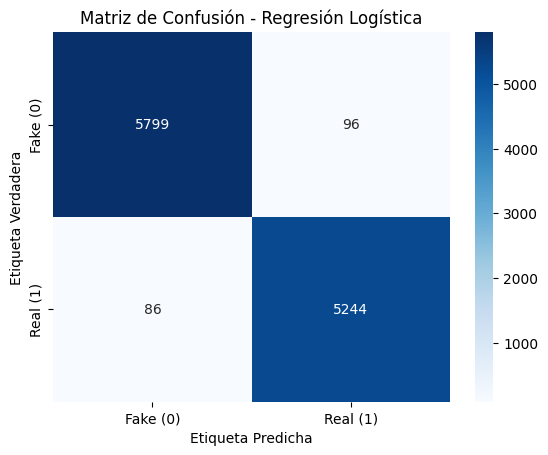

In [15]:
# 1. Hacer predicciones en el conjunto de prueba
y_pred = log_reg_model.predict(X_test)

# 2. Imprimir el reporte de clasificación y la precisión
print("\n--- Resultados de la Evaluación ---")
print(f"Accuracy (Precisión): {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 3. Crear y visualizar la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake (0)', 'Real (1)'],
            yticklabels=['Fake (0)', 'Real (1)'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()